In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from src.nonlinear_approx import approx_nonlinear_func
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# read dataset
linear_df = pd.read_csv('datasets/linear_function_data.txt',delim_whitespace=True, names=["x", "y"])
linear_data = np.array(linear_df,dtype=float)
nonlinear_df = pd.read_csv('datasets/nonlinear_function_data.txt',delim_whitespace=True, names=["x", "y"])
nonlinear_data = np.array(nonlinear_df,dtype=float)

# Part 1

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

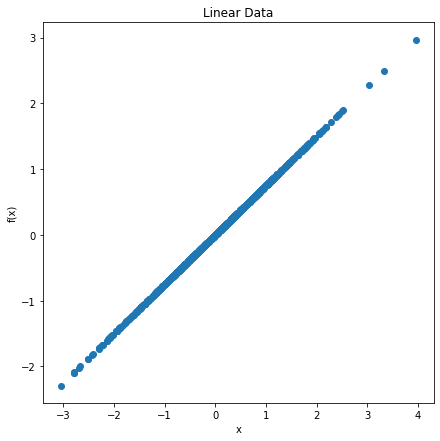

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(linear_data[:,0],linear_data[:,1])
ax.set_title('Linear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

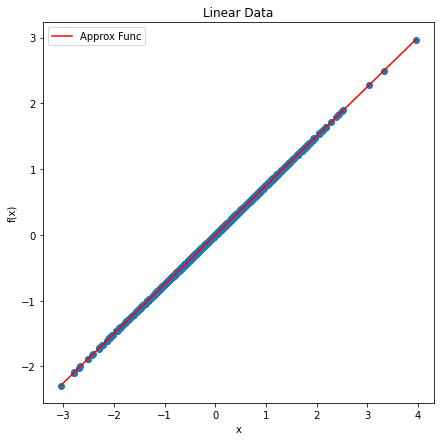

In [4]:
X = np.array([linear_data[:,0]]).T
A,_,_,_ = np.linalg.lstsq(X, linear_data[:,1], rcond=0.000001)

x_new = np.array([np.linspace(np.min(X),np.max(X),1000)]).T
fx_predicted = x_new@A

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(linear_data[:,0],linear_data[:,1])
ax.plot(x_new,fx_predicted, c = 'r',label='Approx Func')
plt.legend()
ax.set_title('Linear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

# Part 2

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

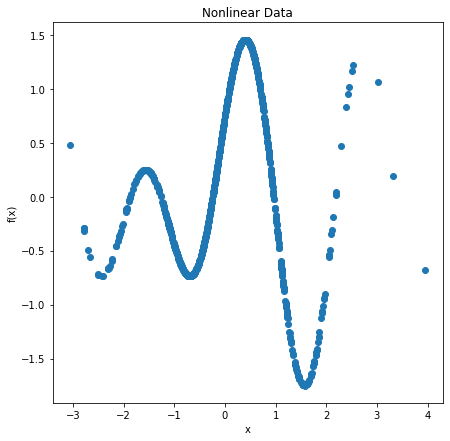

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title('Nonlinear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

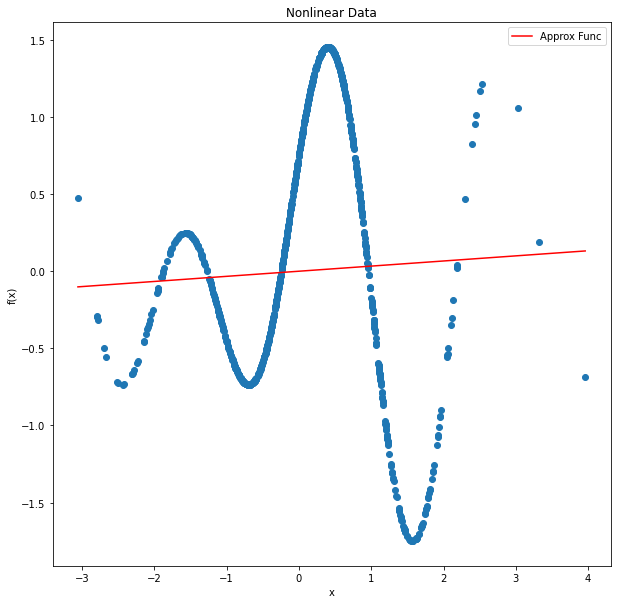

In [6]:
X = np.array([nonlinear_data[:,0]]).T
A,_,_,_ = np.linalg.lstsq(X, nonlinear_data[:,1], rcond=None)

x_new = np.array([np.linspace(np.min(X),np.max(X),1000)]).T
fx_predicted = x_new@A

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.plot(x_new,fx_predicted, c = 'r',label='Approx Func')
plt.legend()
ax.set_title('Nonlinear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

# Part 3

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

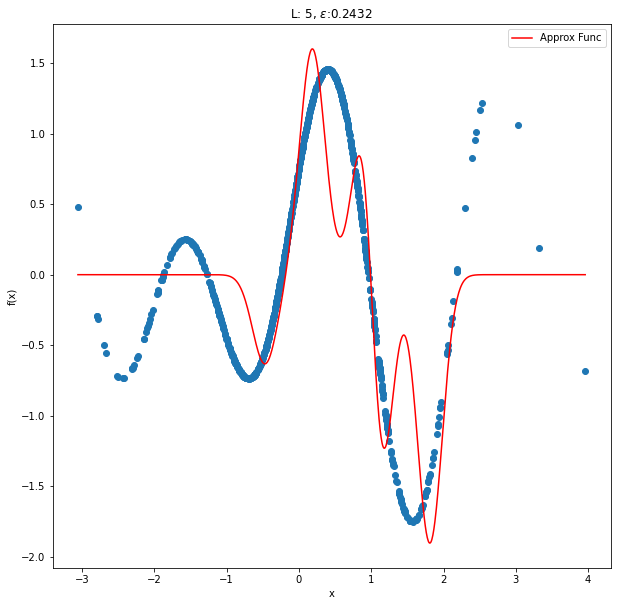

In [7]:
L = 5
e = 0.05

X = np.array([nonlinear_data[:,0]]).T
C,residues,epsilon,x_l = approx_nonlinear_func(X,nonlinear_data[:,1],L,e)


x_new = np.array([np.linspace(np.min(X),np.max(X),1000)]).T
dist_new = cdist(x_new,x_l)
phi_new = np.exp(-dist_new**2/epsilon**2)
fx_predicted = phi_new@C

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(x_new,fx_predicted,color='r',label='Approx Func')
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title(r"L: {0}, $\epsilon$:{1}".format(L,np.round(epsilon,4)))
plt.legend()
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

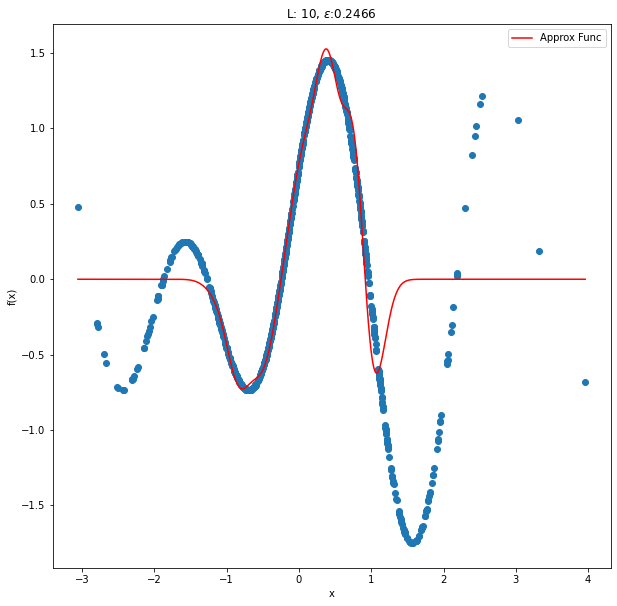

In [8]:
L = 10
e = 0.05

X = np.array([nonlinear_data[:,0]]).T
C,residues,epsilon,x_l = approx_nonlinear_func(X,nonlinear_data[:,1],L,e)


x_new = np.array([np.linspace(np.min(X),np.max(X),1000)]).T
dist_new = cdist(x_new,x_l)
phi_new = np.exp(-dist_new**2/epsilon**2)
fx_predicted = phi_new@C

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(x_new,fx_predicted,color='r',label='Approx Func')
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title(r"L: {0}, $\epsilon$:{1}".format(L,np.round(epsilon,4)))
plt.legend()
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

Minimum Residual is : 0.06098723408140748
At e =  0.38


[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

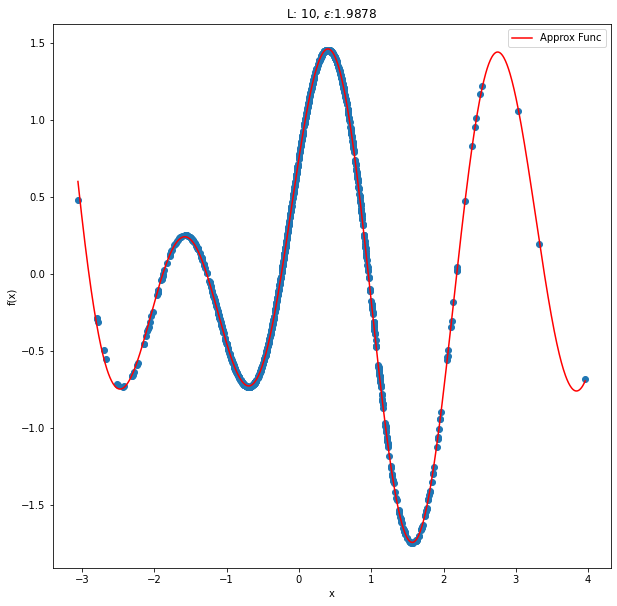

In [9]:
L = 10
e_list = np.linspace(0.01,0.5,50)

X = np.array([nonlinear_data[:,0]]).T

r_list = np.zeros(len(e_list))
eps_list = np.zeros(len(e_list))
c_list = []
xl_list = []
for i,e in enumerate(e_list):

    c,res,eps_list[i],xl = approx_nonlinear_func(X,nonlinear_data[:,1],L,e)
    r_list[i] = res[0] if res.size!= 0 else float("inf")
    c_list.append(c)
    xl_list.append(xl)

print("Minimum Residual is :", min(r_list))
print("At e = " ,e_list[np.argmin(r_list)])
epsilon = eps_list[np.argmin(r_list)]
C = c_list[np.argmin(r_list)]
x_l = xl_list[np.argmin(r_list)]

x_new = np.array([np.linspace(np.min(X),np.max(X),1000)]).T
dist_new = cdist(x_new,x_l)
phi_new = np.exp(-dist_new**2/epsilon**2)
fx_predicted = phi_new@C

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(x_new,fx_predicted,color='r',label='Approx Func')
ax.scatter(nonlinear_data[:,0],nonlinear_data[:,1])
ax.set_title(r"L: {0}, $\epsilon$:{1}".format(L,np.round(epsilon,4)))
plt.legend()
ax.update({'xlabel':'x', 'ylabel':'f(x)'})

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

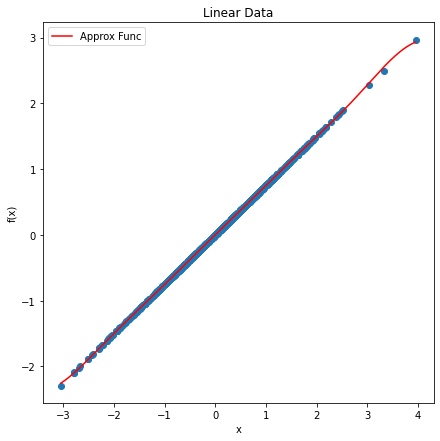

In [10]:
L = 10
e = 0.4

X = np.array([linear_data[:,0]]).T

C,residues,epsilon,x_l = approx_nonlinear_func(X,linear_data[:,1],L,e)

x_new = np.array([np.linspace(np.min(X),np.max(X),1000)]).T
dist_new = cdist(x_new,x_l)
phi_new = np.exp(-dist_new**2/epsilon**2)
fx_predicted = phi_new@C

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter(linear_data[:,0],linear_data[:,1])
ax.plot(x_new,fx_predicted, c = 'r',label='Approx Func')
plt.legend()
ax.set_title('Linear Data')
ax.update({'xlabel':'x', 'ylabel':'f(x)'})